***Exercise 1 (4 points)***
1. Under what conditions will the covariance matrix $\Sigma$ be identical to the correlation matrix? What can you say about the variances of the variables?




- Random variable results are normalized before being tabulated.
- The standard deviation of both variables needs to be 1 on the covariance matrix leading diagonal.
- PMFs/PDFs have to display approachable similarity to a normal distribution.

2. Covariances and Correlation after Normalization Techniques. Robustness of Normalization towards linear feature transformations. 

Let $D \in R^{n×d}$ be some dataset. Suppose that we have, for each column $X_{j}$,  a transfor-maton $f_{j}:R \rightarrow R$ that will modify the values in the $j$-th column. The result of applying these functions will be a new dataset (matrix) $\~{D} \in R^{nxd}$      with $\~{D}_{i,j} = f_{j}(D_{i,j})$ Note that we could have $f_{j}(x) = x$ if we do not want to change values in the $j$-th  column.

Such  a function $f_{j}$ is  said to be affine if it is of the form $f_{j} = ax+b$  for some $a$, $b$ $\in R$.

a) Give an example for a transformation (may be affine or not) that affects the covariance, i.e., the covariance matrix of $\~{D}$ is different from that in $D$.



Let $f_{j}(x) = 0$ for all $j$. Then $cov(x,y) = 0$ for any two random variable samples.

b) Now show that $\^{\~{\mu_j}} = a_{j}\^{\mu_j} + b_{j}$ and that $\^{\~{\sigma_{i,j}}} = a_{i}a_{j}\^{\sigma_{i,j}}$ for any affine transformation $\^{\~{\mu_j}}$, where denotes the empirical mean of attribute $X_{j}$ of $\~{D}$ and $\^{\~{\sigma_{i,j}}}$ is the empirical covariance of attributes $X_{i}$ and $X_{j}$ in $\~{D}$.

Assume $f_j(x)$ is affine with $f_j(x) = a_j \cdot x + b_j$.
Then:
$$\^{\~{\mu_j}} = f_j(\^{\mu})$$
$$= f_j(E[\^{\~{X_j}}])$$
$$= E[f_j(\^{\~{X_j}})]$$
$$= E[a_j \cdot \^{X_j} + b_j]$$
$$= a_j \cdot E[\^{X_j}] + b_j$$
$$= a_j \cdot \^{\mu} + b_j$$
We also have:
$$\^{\~{\sigma_{ij}}} = E[(\^{\~{X_i}}-\^{\~{\mu}})(\^{\~{X_j}}-\^{\~{\mu}})]$$
$$= E[\^{\~{X_i}} \cdot \^{\~{X_j}}] - E[\^{\~{\mu_i}}] \cdot E[\^{\~{\mu_j}}]$$
$$= E[(a_i \cdot \^{X_i} + b_i)(a_j \cdot \^{X_j} + b_j)] - E[a_i \cdot \^{\mu_i} + b_i] \cdot E[a_j \cdot \^{X_j} + b_j]$$
$$= E[a_i \cdot a_j \cdot \^{X_i} \cdot \^{X_j} + a_i \cdot \^{X_i} \cdot b_j + a_j \cdot \^{X_j} \cdot b_i + b_i \cdot b_j] - (a_i \cdot E[\^{\mu_i}] + b_i) \cdot (a_j \cdot E[\^{\mu_j}] + b_j)$$
$$= a_i \cdot a_j \cdot E[\^{X_i} \cdot \^{X_j}] + a_i \cdot E[\^{X_i}] \cdot b_j + a_j \cdot E[\^{X_j}] \cdot b_i + b_i \cdot b_j - (a_i \cdot \^{\mu_i} + b_i) \cdot (a_j \cdot \^{mu_j} + b_j)$$
$$= a_i \cdot a_j \cdot E[\^{X_i} \cdot \^{X_j}] + a_i \cdot E[\^{X_i}] \cdot b_j + a_j \cdot E[\^{X_j}] \cdot b_i + b_i \cdot b_j - a_i \cdot \^{\mu_i}\cdot b_j - a_j \cdot \^{\mu_j} \cdot b_i - b_i \cdot b_j - a_i \cdot a_j \cdot \^{\mu_i} \cdot \^{\mu_j}$$
$$= a_i \cdot a_j \cdot E[\^{X_i} \cdot \^{X_j}] - a_i \cdot a_j \cdot \^{\mu_i} \cdot \^{\mu_j}$$
$$= a_i \cdot a_j (E[\^{X_i} \cdot \^{X_j}] - \^{\mu_i} \cdot \^{\mu_j})$$
$$= a_i \cdot a_j \cdot \^{\sigma_{ij}}$$

c) Now let $\^{\~{\rho_{i,j}}}$ be the correlation between $X_{i}$ and $X_{j}$ in $D$. Show that $\^{\~{\rho_{i,j}}} = \^{\rho_{i,j}}$. State in your own words what this property means (one sentence).

We have:
$$\^{\~{\rho_{12}}} = \frac{\^{\~{\sigma_{12}}}}{\^{\~{\sigma_1}} \cdot \^{\~{\sigma_2}}}$$
$$= \frac{\^{\~{\sigma_{12}}}}{\sqrt{\^{\~{\sigma_1^2}} \cdot \^{\~{\sigma_2^2}}}}$$
$$= \frac{a_i \cdot a_j \cdot \^{\sigma_{12}}}{\sqrt{(a_i^2 \cdot \^{\sigma_1^2}) \cdot (a_j^2 \cdot \^{\sigma_2^2})}}$$
$$= \frac{a_i \cdot a_j \cdot \^{\sigma_{12}}}{\sqrt{a_i^2 \cdot a_j^2 \cdot \^{\sigma_1^2} \cdot \^{\sigma_2^2}}}$$
$$= \frac{a_i \cdot a_j \cdot \^{\sigma_{12}}}{a_i \cdot a_j \sqrt{\^{\sigma_1^2 \cdot \sigma_2^2}}}$$
$$= \frac{\^{\sigma_{12}}}{\sqrt{\^{\sigma_1^2 \cdot \sigma_2^2}}}$$
$$= \frac{\^{\sigma_{12}}}{\^{\sigma_1} \cdot \^{\sigma_2}}$$
$$= \^{\rho_{12}}$$

This means that when any affine function is applied to a set of columns from a matrix, its covariance matrix will not change.


***Exercise 2 (4 Points)***

Use only one notebook for the following exercises. Answer the ques-tions in separate markdowncells under the corresponding code. 

Do notuse any lirbary’s function to compute the mean, cov or cor (like np.cov) within thisexercise.

Make sure that your functions have exactly the required name (in order to make them appli-cable to unit tests).

1. Write a function getStats(A) that outputs (i) the sample mean, the sample covariance matrix, and (iii) the correlation matrix for a given 2-dimensional numpy arrayA.

In [6]:
import numpy as np

def getStats(A):
    vector_sample_mean = []
    # vector_covariance = np.array([[]])
    # vector_correlation = np.array([[]])
    list_cov = np.array([[]])
    list_corr = np.array([[]])
    
    # Calculate the Sample Mean
    for j in range(np.size(A, 1)):
        sample_mean = 0
        for i in range(np.size(A, 0)):
            sample_mean += A[i, j]/np.size(A, 0)
        vector_sample_mean += [sample_mean]

    vector_covariance = np.empty((0,len(vector_sample_mean)))
    vector_correlation = np.empty((0,len(vector_sample_mean)))

    #Calculate the Sample Covariance Matrix
    for j in range (len(vector_sample_mean)):
        list_cov = np.array([[]])
        for i in range (len(vector_sample_mean)):
            cov1 = np.array([A[:,j]-vector_sample_mean[j]])
            cov2 = (np.array([A[:,i]-vector_sample_mean[i]]))
            covariance = ((np.dot(cov2, cov1.T)))/len(A[:, i])
            list_cov = np.column_stack([list_cov, covariance])
        vector_covariance =  np.row_stack([vector_covariance, list_cov])
        
    #Calculate the Correlation Matrix
    for j in range (len(vector_sample_mean)):
        list_corr = np.array([[]])
        for i in range (len(vector_sample_mean)):
            corr1 = np.array([A[:,j]-vector_sample_mean[j]])
            corr2 = np.array([A[:,i]-vector_sample_mean[i]])
            sqrt1 = np.sqrt((np.dot(corr1, corr1.T)))
            sqrt2 = np.sqrt((np.dot(corr2, corr2.T)))
            correlation = ((np.dot(corr2, corr1.T)))/(np.dot(sqrt1, sqrt2))
            list_corr = np.column_stack([list_corr, correlation])
        vector_correlation =  np.row_stack([vector_correlation, list_corr])
 
    return np.round(vector_sample_mean,3), np.round(vector_covariance, 3), np.round(vector_correlation, 3)


2. Write a function drawPrincipalDirections(D) that looks at each combination of twoattributes Xi,Xj in D and does the following for each such combination:

a) it computes the covariance matrixΣfor the two columns Xi and Xj.

b) it computes the eigenvalues and the eigenvectors ofΣ. For this, you can use anexisting library to implement your function.

c) it scatters all the points ofDin these two dimensions in a 2D-plot. Next, it drawstwo lines through the center of the plotted data (ˆμiandˆμj) and in the range of thedata (from min to max value inXi). The slopes of these lines is determined by theeigenvectors computed before. That is, the slope of the first line is the same as theone of the first eigenvector, and the slope of the second line is the same as the oneof the second eigenvector.

None


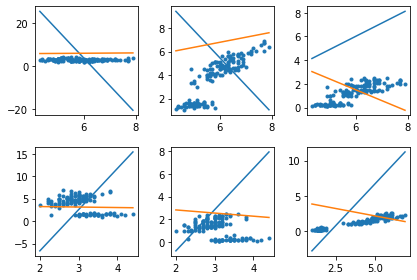

In [7]:
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from numpy import linalg as LA

dfIrisTest = pd.read_csv(
    "https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")
D = dfIrisTest.values[:, 0:4].astype(float)


def drawPrincipalDirections(D):
    columns = np.size(D, 1)
    indexes = list(range(0, (columns)))
    combs = itertools.combinations(indexes, 2)
    contador = 1
    for comb1, comb2 in combs:
        xi = D[:, comb1]
        xj = D[:, comb2]
        stats = getStats(D)
        # Covariancew
        covariance1 = stats[1][comb1, comb1], stats[1][comb2, comb1]
        covariance2 = stats[1][comb1, comb2], stats[1][comb2, comb2]
        covariance = np.column_stack([covariance1, covariance2])
        eigen_value, eigen_vector = LA.eig(covariance)
        plt.subplot(2, 3, contador)
        contador += 1
        plt.tight_layout()
        plt.scatter(xi, xj, marker='.')
        x1 = np.linspace(xi.min(),xi.max())
        x2 = np.linspace(xi.min(),xi.max())
        y1 = ((eigen_vector[0, 0]/eigen_vector[1, 0])*(x1-stats[0][comb1])) + stats[0][comb1]
        y2 = (((eigen_vector[0, 1]/eigen_vector[1, 1]))*(x2-stats[0][comb2])) + stats[0][comb1]
        plt.plot(x1, y1)
        plt.plot(x2, y2)


print(drawPrincipalDirections(D))


3. The mean and variance observed in the sample are good estimates for the mean and
variance of the population from which the data have been observed. We now compare
empirical data and estimated population distributons. In the following, $D$ is a Pandas
dataframe, and att is the name of one of its columns. Be completely general: Do not
rely on the iris data here.

a) Implement functions normalOverlay(D, att,ax=None) and uniformOverlay(D,
att,ax=None) that plot the density function of a normal and uniform distribution
for the attribute att based on the parameters derived from the sample data in
D respectively (use getStats). Then plot a histogram of the data into the same
graphic. If ax is not None, create the plots within that object; otherwise create a
new figure and create the plots inside the new figure.

In [8]:
import scipy.stats as statis
import math

dfIrisTest = pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")

def normalOverlay(D, att, ax=None):
    column = D.columns.get_loc(att)
    for i in range(len(D.columns)):
        if(type(D.iloc[:, i][0]) == type('str')):
            D = D.drop(D.columns[i], axis = 1)
    DFinal = D.to_numpy()
    stats = getStats(DFinal)
    variance = stats[1][column,column]
    mean = stats[0][column]
    x = np.linspace((mean - 10)*(math.sqrt(variance)), (mean + 10)*(math.sqrt(variance)), 50)
    sewy = statis.norm.pdf(x, mean, math.sqrt(variance))
    if ax == None:
        plt.subplot(1,2,1)
        plt.plot(x, sewy*len(DFinal[:,column]))
        plt.hist(sewy*len(DFinal[:,column]))
    else:
        ax.plot(x, sewy*len(DFinal[:,column]))
        ax.hist(sewy*len(DFinal[:,column]))

def uniformOverlay(D, att, ax=None):
    column = D.columns.get_loc(att)
    for i in range(len(D.columns)):
        if(type(D.iloc[:, i][0]) == type('str')):
            D = D.drop(D.columns[i], axis = 1)
    DFinal = D.to_numpy()
    minimum = min(DFinal[:,column])
    maximum = max(DFinal[:,column])
    x = np.linspace(minimum, maximum, 100)
    t = 1/(maximum - minimum)
    y = np.full(100,t)
    if(ax == None):
        plt.subplot(1,2,2)
        plt.plot(x, y*len(DFinal[:,column]))
        plt.hist(DFinal[:,column])
    else:
        ax.plot(x, y*len(DFinal[:,column]))
        ax.hist(DFinal[:,column])

b) Create a 4×2 plot grid (4 rows, 2 colums, use the subplots method) in which you
plot the normal/uniform densities for each of the four attributes of the iris dataset
(uniform on the left, normal on the right) together with the histograms describing
the true empirical data.


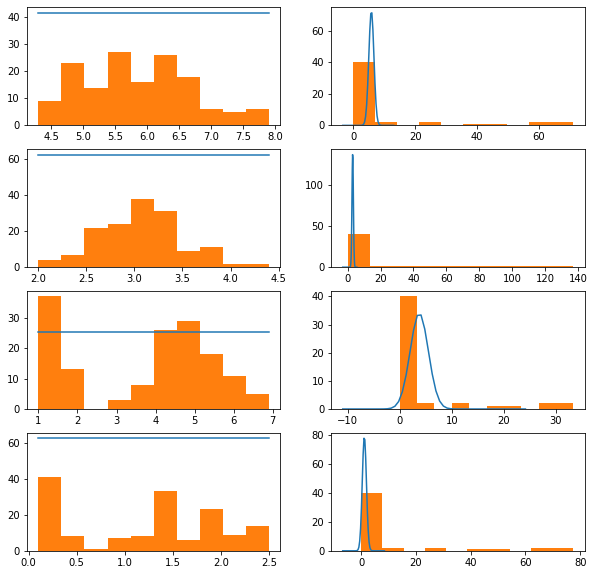

In [9]:
dfIrisTest = pd.read_csv(
    "https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")
fig, ax = plt.subplots(4, 2, figsize=(10, 10))
uniformOverlay(dfIrisTest, "sepal_length", ax[0,0])
normalOverlay(dfIrisTest, "sepal_length", ax[0,1])
uniformOverlay(dfIrisTest, "sepal_width",ax[1,0])
normalOverlay(dfIrisTest, "sepal_width",ax[1,1])
uniformOverlay(dfIrisTest, "petal_length",ax[2,0])
normalOverlay(dfIrisTest, "petal_length",ax[2,1])
uniformOverlay(dfIrisTest, "petal_width", ax[3,0])
normalOverlay(dfIrisTest, "petal_width", ax[3,1])


C) Discuss how well the density functions reflect the observed density of the data. Do
you think that the attributes follow one of the distributions? Which and why?

siguen mas una distribución exponencial
